In [35]:
# Importing dependencies
import pandas as pd
import nltk
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Loading processed file
file = 'processed_movie_dialogues.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df

,Unnamed: 0,Comment,Reply,Comment Length,Reply Length
0,0,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,22,14
1,1,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9
2,2,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12
3,3,you are asking me out that is so cute what is ...,forget it,14,2
4,4,no no it is my fault we did not have a proper ...,cameron,15,1
...,...,...,...,...,...
221611,221611,your orders mr vereker,i am to take the sikali with the main column t...,4,13
221612,221612,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12
221613,221613,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23
221614,221614,well i assure you sir i have no desire to crea...,and i assure you you do not in fact i would be...,13,22


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df

,Comment,Reply,Comment Length,Reply Length
0,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,22,14
1,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9
2,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12
3,you are asking me out that is so cute what is ...,forget it,14,2
4,no no it is my fault we did not have a proper ...,cameron,15,1
...,...,...,...,...
221611,your orders mr vereker,i am to take the sikali with the main column t...,4,13
221612,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12
221613,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23
221614,well i assure you sir i have no desire to crea...,and i assure you you do not in fact i would be...,13,22


In [7]:
fdist_common_comments = FreqDist(df['Comment'])
fdist_common_comments.most_common(50)

[('what', 1688),
 ('yes', 1355),
 ('no', 1273),
 ('yeah', 1000),
 ('why', 522),
 ('i do not know', 295),
 ('hello', 257),
 ('who', 251),
 ('why not', 222),
 ('what is it', 213),
 ('what do you mean', 211),
 ('what is that', 207),
 (nan, 203),
 ('okay', 201),
 ('oh', 199),
 ('huh', 198),
 ('what are you doing', 190),
 ('really', 189),
 ('hi', 186),
 ('thank you', 178),
 ('i know', 168),
 ('yes sir', 162),
 ('well', 150),
 ('what happened', 147),
 ('sure', 145),
 ('what are you talking about', 145),
 ('uhhuh', 142),
 ('i am sorry', 137),
 ('where', 137),
 ('that is right', 131),
 ('right', 125),
 ('how', 116),
 ('so', 116),
 ('hey', 113),
 ('excuse me', 110),
 ('thanks', 110),
 ('nothing', 108),
 ('what is this', 103),
 ('what do you want', 101),
 ('what is wrong', 97),
 ('where are you going', 95),
 ('of course', 83),
 ('when', 82),
 ('oh yeah', 79),
 ('what do you think', 77),
 ('who are you', 77),
 ('what for', 76),
 ('sorry', 76),
 ('what are you doing here', 75),
 ('shit', 72)]

In [8]:
# Dropping NaNs
df = df.drop(df[df['Comment'].isna()].index)
df = df.drop(df[df['Reply'].isna()].index)

In [9]:
df

,Comment,Reply,Comment Length,Reply Length
0,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,22,14
1,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9
2,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12
3,you are asking me out that is so cute what is ...,forget it,14,2
4,no no it is my fault we did not have a proper ...,cameron,15,1
...,...,...,...,...
221611,your orders mr vereker,i am to take the sikali with the main column t...,4,13
221612,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12
221613,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23
221614,well i assure you sir i have no desire to crea...,and i assure you you do not in fact i would be...,13,22


In [10]:
fdist_common_comments = FreqDist(df['Comment'])
fdist_common_comments.most_common(50)

[('what', 1686),
 ('yes', 1355),
 ('no', 1271),
 ('yeah', 1000),
 ('why', 522),
 ('i do not know', 295),
 ('hello', 257),
 ('who', 251),
 ('why not', 222),
 ('what is it', 213),
 ('what do you mean', 211),
 ('what is that', 207),
 ('oh', 198),
 ('huh', 198),
 ('okay', 197),
 ('what are you doing', 190),
 ('really', 189),
 ('hi', 185),
 ('thank you', 178),
 ('i know', 168),
 ('yes sir', 162),
 ('well', 149),
 ('what happened', 147),
 ('sure', 145),
 ('what are you talking about', 145),
 ('uhhuh', 142),
 ('i am sorry', 137),
 ('where', 137),
 ('that is right', 131),
 ('right', 125),
 ('how', 116),
 ('so', 116),
 ('hey', 112),
 ('excuse me', 110),
 ('thanks', 110),
 ('nothing', 108),
 ('what is this', 103),
 ('what do you want', 101),
 ('what is wrong', 97),
 ('where are you going', 95),
 ('of course', 83),
 ('when', 82),
 ('oh yeah', 79),
 ('what do you think', 77),
 ('who are you', 77),
 ('what for', 76),
 ('what are you doing here', 75),
 ('sorry', 75),
 ('jesus', 72),
 ('shit', 71)]

In [11]:
fdist_common_replies = FreqDist(df['Reply'])
fdist_common_replies.most_common(50)

[('what', 1557),
 ('yes', 1510),
 ('no', 1460),
 ('yeah', 1137),
 ('why', 508),
 ('i do not know', 398),
 ('okay', 368),
 ('sure', 277),
 ('oh', 271),
 ('thank you', 246),
 ('who', 245),
 ('why not', 238),
 ('yes sir', 237),
 ('i know', 226),
 ('huh', 212),
 ('right', 210),
 ('really', 207),
 ('what do you mean', 206),
 ('thanks', 185),
 ('uhhuh', 175),
 ('nothing', 167),
 ('that is right', 161),
 ('of course', 154),
 ('what are you talking about', 145),
 ('where', 137),
 ('i am sorry', 135),
 ('good', 127),
 ('what is that', 120),
 ('how', 118),
 ('what is it', 108),
 ('fine', 103),
 ('excuse me', 101),
 ('hi', 100),
 ('oh yeah', 99),
 ('shut up', 97),
 ('so', 96),
 ('well', 95),
 ('sorry', 88),
 ('no sir', 76),
 ('ok', 76),
 ('i see', 75),
 ('what happened', 75),
 ('all right', 75),
 ('when', 74),
 ('please', 74),
 ('what for', 73),
 ('maybe', 72),
 ('me', 70),
 ('like what', 70),
 ('hello', 69)]

In [12]:
# Tokenizing Text
df['Tokenized Comment'] = df['Comment'].apply(word_tokenize)
df['Tokenized Reply'] = df['Reply'].apply(word_tokenize)
df

,Comment,Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply
0,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,22,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro..."
1,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin..."
2,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f..."
3,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]"
4,no no it is my fault we did not have a proper ...,cameron,15,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron]
...,...,...,...,...,...,...
221611,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main..."
221612,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12,"[i, am, to, take, the, sikali, with, the, main...","[lord, chelmsford, seems, to, want, me, to, st..."
221613,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23,"[lord, chelmsford, seems, to, want, me, to, st...","[i, think, chelmsford, wants, a, good, man, on..."
221614,well i assure you sir i have no desire to crea...,and i assure you you do not in fact i would be...,13,22,"[well, i, assure, you, sir, i, have, no, desir...","[and, i, assure, you, you, do, not, in, fact, ..."


In [13]:
all_words_comments = list(itertools.chain.from_iterable(df['Tokenized Comment'][:]))
all_words_replies = list(itertools.chain.from_iterable(df['Tokenized Reply'][:]))

In [14]:
fdist_common_comment_words = FreqDist(all_words_comments)
fdist_common_comment_words.most_common(20)

[('you', 108817),
 ('i', 97638),
 ('the', 69581),
 ('to', 62163),
 ('is', 56837),
 ('a', 49737),
 ('not', 48615),
 ('it', 45428),
 ('do', 33346),
 ('that', 32924),
 ('and', 31433),
 ('what', 29373),
 ('are', 28523),
 ('of', 27753),
 ('have', 24464),
 ('in', 23940),
 ('me', 22814),
 ('we', 20044),
 ('he', 19034),
 ('am', 17767)]

In [15]:
fdist_common_reply_words = FreqDist(all_words_replies)
fdist_common_reply_words.most_common(20)

[('i', 106367),
 ('you', 105288),
 ('the', 71148),
 ('to', 63937),
 ('is', 57707),
 ('not', 52806),
 ('a', 52378),
 ('it', 49174),
 ('that', 34481),
 ('do', 34310),
 ('and', 34176),
 ('of', 29078),
 ('are', 26992),
 ('what', 25735),
 ('in', 24955),
 ('have', 24868),
 ('me', 23816),
 ('he', 20381),
 ('we', 20375),
 ('am', 19469)]

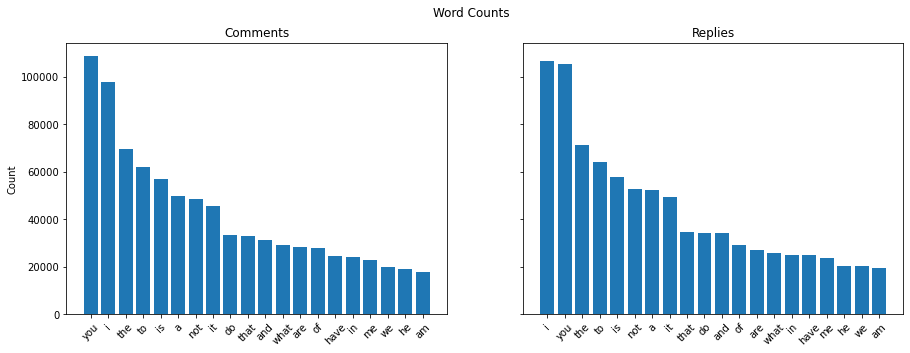

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
x_comment_word = dict(fdist_common_comment_words.most_common(20)).keys()
y_comment_word_count = dict(fdist_common_comment_words.most_common(20)).values()
x_reply_word = dict(fdist_common_reply_words.most_common(20)).keys()
y_reply_word_count = dict(fdist_common_reply_words.most_common(20)).values()
ax[0].bar(x_comment_word, y_comment_word_count)
ax[0].tick_params('x', rotation = 45)
ax[0].set_title('Comments')
ax[1].bar(x_reply_word, y_reply_word_count)
ax[1].tick_params('x', rotation = 45)
ax[1].set_title('Replies')
ax[0].set_ylabel('Count')
fig.suptitle('Word Counts')
plt.show()

In [17]:
# Defining function to remove stopwords
stop_words = set(stopwords.words("english"))
def remove_stopwords(text):
    return [i for i in text if i not in stop_words]

In [18]:
df['Filtered Comment'] = df['Tokenized Comment'].apply(remove_stopwords)
df['Filtered Reply'] = df['Tokenized Reply'].apply(remove_stopwords)
df

,Comment,Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Filtered Comment,Filtered Reply
0,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,22,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o..."
1,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]"
2,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]"
3,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget]
4,no no it is my fault we did not have a proper ...,cameron,15,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron]
...,...,...,...,...,...,...,...,...
221611,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]"
221612,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12,"[i, am, to, take, the, sikali, with, the, main...","[lord, chelmsford, seems, to, want, me, to, st...","[take, sikali, main, column, river]","[lord, chelmsford, seems, want, stay, back, ba..."
221613,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23,"[lord, chelmsford, seems, to, want, me, to, st...","[i, think, chelmsford, wants, a, good, man, on...","[lord, chelmsford, seems, want, stay, back, ba...","[think, chelmsford, wants, good, man, border, ..."
221614,well i assure you sir i have no desire to crea...,and i assure you you do not in fact i would be...,13,22,"[well, i, assure, you, sir, i, have, no, desir...","[and, i, assure, you, you, do, not, in, fact, ...","[well, assure, sir, desire, create, difficulti...","[assure, fact, would, obliged, best, advice, s..."


In [19]:
# Tagging our words with parts of speed
df['Filtered Comment with tag'] = df['Filtered Comment'].apply(nltk.tag.pos_tag)
df['Filtered Reply with tag'] = df['Filtered Reply'].apply(nltk.tag.pos_tag)
df

,Comment,Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Filtered Comment,Filtered Reply,Filtered Comment with tag,Filtered Reply with tag
0,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,22,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star..."
1,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB..."
2,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine..."
3,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]"
4,no no it is my fault we did not have a proper ...,cameron,15,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]"
...,...,...,...,...,...,...,...,...,...,...
221611,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column..."
221612,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12,"[i, am, to, take, the, sikali, with, the, main...","[lord, chelmsford, seems, to, want, me, to, st...","[take, sikali, main, column, river]","[lord, chelmsford, seems, want, stay, back, ba...","[(take, VB), (sikali, NN), (main, JJ), (column...","[(lord, NN), (chelmsford, NN), (seems, VBZ), (..."
221613,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23,"[lord, chelmsford, seems, to, want, me, to, st...","[i, think, chelmsford, wants, a, good, man, on...","[lord, chelmsford, seems, want, stay, back, ba...","[think, chelmsford, wants, good, man, border, ...","[(lord, NN), (chelmsford, NN), (seems, VBZ), (...","[(think, NN), (chelmsford, NN), (wants, VBZ), ..."
221614,well i assure you sir i have no desire to crea...,and i assure you you do not in fact i would be...,13,22,"[well, i, assure, you, sir, i, have, no, desir...","[and, i, assure, you, you, do, not, in, fact, ...","[well, assure, sir, desire, create, difficulti...","[assure, fact, would, obliged, best, advice, s...","[(well, RB), (assure, NN), (sir, NN), (desire,...","[(assure, NN), (fact, NN), (would, MD), (oblig..."


In [20]:
# Defining function to convert our POS tags into WordNet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [21]:
# Convert tags into WordNet POS format
df['Filtered Comment with WordNet'] = df['Filtered Comment with tag'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df['Filtered Reply with WordNet'] = df['Filtered Reply with tag'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df

,Comment,Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Filtered Comment,Filtered Reply,Filtered Comment with tag,Filtered Reply with tag,Filtered Comment with WordNet,Filtered Reply with WordNet
0,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,22,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star...","[(make, v), (quick, a), (roxanne, n), (korrine...","[(well, r), (thought, r), (would, n), (start, ..."
1,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(well, r), (thought, r), (would, n), (start, ...","[(hacking, v), (gagging, v), (spitting, v), (p..."
2,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine...","[(hacking, v), (gagging, v), (spitting, v), (p...","[(okay, a), (try, n), (french, a), (cuisine, n..."
3,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]","[(asking, v), (cute, n), (name, n)]","[(forget, n)]"
4,no no it is my fault we did not have a proper ...,cameron,15,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]","[(fault, n), (proper, a), (introduction, n)]","[(cameron, n)]"
...,...,...,...,...,...,...,...,...,...,...,...,...
221611,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column...","[(orders, n), (mr, v), (vereker, n)]","[(take, v), (sikali, n), (main, a), (column, n..."
221612,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12,"[i, am, to, take, the, sikali, with, the, main...","[lord, chelmsford, seems, to, want, me, to, st...","[take, sikali, main, column, river]","[lord, chelmsford, seems, want, stay, back, ba...","[(take, VB), (sikali, NN), (main, JJ), (column...","[(lord, NN), (chelmsford, NN), (seems, VBZ), (...","[(take, v), (sikali, n), (main, a), (column, n...","[(lord, n), (chelmsford, n), (seems, v), (want..."
221613,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23,"[lord, chelmsford, seems, to, want, me, to, st...","[i, think, chelmsford, wants, a, good, man, on...","[lord, chelmsford, seems, want, stay, back, ba...","[think, chelmsford, wants, good, man, border, ...","[(lord, NN), (chelmsford, NN), (seems, VBZ), (...","[(think, NN), (chelmsford, NN), (wants, VBZ), ...","[(lord, n), (chelmsford, n), (seems, v), (want...","[(think, n), (chelmsford, n), (wants, v), (goo..."
221614,well i assure you sir i have no desire to crea...,and i assure you you do not in fact i would be...,13,22,"[well, i, assure, you, si

In [22]:
# Lemmatize our tagged comments and replies
wordnet_lemmatizer = WordNetLemmatizer()
df['Lemmatized Comment'] = df['Filtered Comment with WordNet'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word, tag) for word, tag in x])
df['Lemmatized Reply'] = df['Filtered Reply with WordNet'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word, tag) for word, tag in x])
df

,Comment,Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Filtered Comment,Filtered Reply,Filtered Comment with tag,Filtered Reply with tag,Filtered Comment with WordNet,Filtered Reply with WordNet,Lemmatized Comment,Lemmatized Reply
0,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,22,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star...","[(make, v), (quick, a), (roxanne, n), (korrine...","[(well, r), (thought, r), (would, n), (start, ...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o..."
1,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(well, r), (thought, r), (would, n), (start, ...","[(hacking, v), (gagging, v), (spitting, v), (p...","[well, thought, would, start, pronunciation, o...","[hack, gag, spit, part, please]"
2,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine...","[(hacking, v), (gagging, v), (spitting, v), (p...","[(okay, a), (try, n), (french, a), (cuisine, n...","[hack, gag, spit, part, please]","[okay, try, french, cuisine, saturday, night]"
3,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]","[(asking, v), (cute, n), (name, n)]","[(forget, n)]","[ask, cute, name]",[forget]
4,no no it is my fault we did not have a proper ...,cameron,15,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]","[(fault, n), (proper, a), (introduction, n)]","[(cameron, n)]","[fault, proper, introduction]",[cameron]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column...","[(orders, n), (mr, v), (vereker, n)]","[(take, v), (sikali, n), (main, a), (column, n...","[order, mr, vereker]","[take, sikali, main, column, river]"
221612,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12,"[i, am, to, take, the, sikali, with, the, main...","[lord, chelmsford, seems, to, want, me, to, st...","[take, sikali, main, column, river]","[lord, chelmsford, seems, want, stay, back, ba...","[(take, VB), (sikali, NN), (main, JJ), (column...","[(lord, NN), (chelmsford, NN), (seems, VBZ), (...","[(take, v), (sikali, n), (main, a), (column, n...","[(lord, n), (chelmsford, n), (seems, v), (want...","[take, sikali, main, column, river]","[lord, chelmsford, seem, want, stay, back, bas..."
221613,lord chelmsford seems to want me to stay back ...,i think chelmsford wants a good man on the bor...,12,23,"[lord, chelmsfor

In [27]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['Sentiment Comment'] = df['Lemmatized Comment'].apply(lambda x: sid.polarity_scores(' '.join(x)))
df['Sentiment Reply'] = df['Lemmatized Reply'].apply(lambda x: sid.polarity_scores(' '.join(x)))
df

,Comment,Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Filtered Comment,Filtered Reply,Filtered Comment with tag,Filtered Reply with tag,Filtered Comment with WordNet,Filtered Reply with WordNet,Lemmatized Comment,Lemmatized Reply,Sentiment Comment,Sentiment Reply
0,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,22,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star...","[(make, v), (quick, a), (roxanne, n), (korrine...","[(well, r), (thought, r), (would, n), (start, ...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou...","{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound..."
1,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(well, r), (thought, r), (would, n), (start, ...","[(hacking, v), (gagging, v), (spitting, v), (p...","[well, thought, would, start, pronunciation, o...","[hack, gag, spit, part, please]","{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...","{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com..."
2,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine...","[(hacking, v), (gagging, v), (spitting, v), (p...","[(okay, a), (try, n), (french, a), (cuisine, n...","[hack, gag, spit, part, please]","[okay, try, french, cuisine, saturday, night]","{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...","{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp..."
3,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]","[(asking, v), (cute, n), (name, n)]","[(forget, n)]","[ask, cute, name]",[forget],"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
4,no no it is my fault we did not have a proper ...,cameron,15,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]","[(fault, n), (proper, a), (introduction, n)]","[(cameron, n)]","[fault, proper, introduction]",[cameron],"{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column...","[(orders, n), (mr, v), (vereker, n)]","[(take, v), (sikali, n), (main, a), (column, n...","[order, mr, vereker]","[take, sikali, main, column, river]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
221612,i am to take the sikali with the main column t...,lord chelmsf

In [31]:
# Sentiment Analysis Compound Score
df['Sentiment Comment Compound Score'] = df['Sentiment Comment'].apply(lambda x: x['compound'])
df['Sentiment Reply Compound Score'] = df['Sentiment Reply'].apply(lambda x: x['compound'])
df

,Comment,Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Filtered Comment,Filtered Reply,Filtered Comment with tag,Filtered Reply with tag,Filtered Comment with WordNet,Filtered Reply with WordNet,Lemmatized Comment,Lemmatized Reply,Sentiment Comment,Sentiment Reply,Sentiment Comment Compound Score,Sentiment Reply Compound Score
0,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,22,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star...","[(make, v), (quick, a), (roxanne, n), (korrine...","[(well, r), (thought, r), (would, n), (start, ...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou...","{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",-0.6240,0.4588
1,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(well, r), (thought, r), (would, n), (start, ...","[(hacking, v), (gagging, v), (spitting, v), (p...","[well, thought, would, start, pronunciation, o...","[hack, gag, spit, part, please]","{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...","{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...",0.4588,-0.0258
2,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine...","[(hacking, v), (gagging, v), (spitting, v), (p...","[(okay, a), (try, n), (french, a), (cuisine, n...","[hack, gag, spit, part, please]","[okay, try, french, cuisine, saturday, night]","{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...","{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp...",-0.0258,0.2263
3,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]","[(asking, v), (cute, n), (name, n)]","[(forget, n)]","[ask, cute, name]",[forget],"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.4588,-0.2263
4,no no it is my fault we did not have a proper ...,cameron,15,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]","[(fault, n), (proper, a), (introduction, n)]","[(cameron, n)]","[fault, proper, introduction]",[cameron],"{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.4019,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column...","[(orders, n), (mr, v), (vereker, n)]","[(take, v), (sikali, n), (main, a), (column, n...","[order, mr, vereker]","[take, sikali, main, column, river]","{'neg': 0.0, 'neu': 1.0, 

In [33]:
# Categorize Sentiment Analysis Compound Score
df['Sentiment Comment Classification'] = df['Sentiment Comment Compound Score'].apply(lambda x: 'positive' if x>0 else ('negative' if x<0 else 'neutral'))
df['Sentiment Reply Classification'] = df['Sentiment Reply Compound Score'].apply(lambda x: 'positive' if x>0 else ('negative' if x<0 else 'neutral'))
df

,Comment,Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Filtered Comment,Filtered Reply,Filtered Comment with tag,Filtered Reply with tag,Filtered Comment with WordNet,Filtered Reply with WordNet,Lemmatized Comment,Lemmatized Reply,Sentiment Comment,Sentiment Reply,Sentiment Comment Compound Score,Sentiment Reply Compound Score,Sentiment Comment Classification,Sentiment Reply Classification
0,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,22,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star...","[(make, v), (quick, a), (roxanne, n), (korrine...","[(well, r), (thought, r), (would, n), (start, ...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou...","{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",-0.6240,0.4588,negative,positive
1,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(well, r), (thought, r), (would, n), (start, ...","[(hacking, v), (gagging, v), (spitting, v), (p...","[well, thought, would, start, pronunciation, o...","[hack, gag, spit, part, please]","{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...","{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...",0.4588,-0.0258,positive,negative
2,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine...","[(hacking, v), (gagging, v), (spitting, v), (p...","[(okay, a), (try, n), (french, a), (cuisine, n...","[hack, gag, spit, part, please]","[okay, try, french, cuisine, saturday, night]","{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...","{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp...",-0.0258,0.2263,negative,positive
3,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]","[(asking, v), (cute, n), (name, n)]","[(forget, n)]","[ask, cute, name]",[forget],"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.4588,-0.2263,positive,negative
4,no no it is my fault we did not have a proper ...,cameron,15,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]","[(fault, n), (proper, a), (introduction, n)]","[(cameron, n)]","[fault, proper, introduction]",[cameron],"{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.4019,0.0000,negative,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column...","[(orders, n), (m

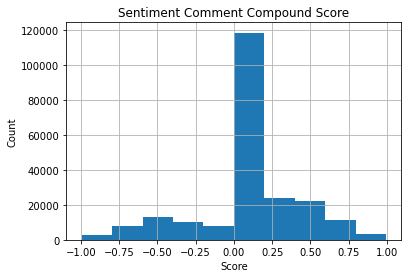

In [52]:
df['Sentiment Comment Compound Score'].hist()
plt.title('Sentiment Comment Compound Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

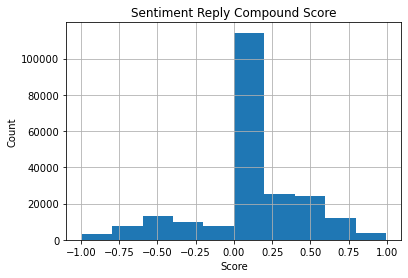

In [53]:
df['Sentiment Reply Compound Score'].hist()
plt.title('Sentiment Reply Compound Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [64]:
# Sentiment Analysis Compound Score Overall
df['Sentiment Score Overall'] = df['Sentiment Comment Compound Score'] + df['Sentiment Reply Compound Score']
df['Sentiment Score Overall Classification'] = df['Sentiment Score Overall'].apply(lambda x: 'positive' if x>0 else ('negative' if x<0 else 'neutral'))
df

,Comment,Reply,Comment Length,Reply Length,Tokenized Comment,Tokenized Reply,Filtered Comment,Filtered Reply,Filtered Comment with tag,Filtered Reply with tag,...,Lemmatized Comment,Lemmatized Reply,Sentiment Comment,Sentiment Reply,Sentiment Comment Compound Score,Sentiment Reply Compound Score,Sentiment Comment Classification,Sentiment Reply Classification,Sentiment Score Overall,Sentiment Score Overall Classification
0,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,22,14,"[can, we, make, this, quick, roxanne, korrine,...","[well, i, thought, we, would, start, with, pro...","[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","[(make, VB), (quick, JJ), (roxanne, NN), (korr...","[(well, RB), (thought, RB), (would, MD), (star...",...,"[make, quick, roxanne, korrine, andrew, barret...","[well, thought, would, start, pronunciation, o...","{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou...","{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",-0.6240,0.4588,negative,positive,-0.1652,negative
1,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,14,9,"[well, i, thought, we, would, start, with, pro...","[not, the, hacking, and, gagging, and, spittin...","[well, thought, would, start, pronunciation, o...","[hacking, gagging, spitting, part, please]","[(well, RB), (thought, RB), (would, MD), (star...","[(hacking, VBG), (gagging, VBG), (spitting, VB...",...,"[well, thought, would, start, pronunciation, o...","[hack, gag, spit, part, please]","{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...","{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...",0.4588,-0.0258,positive,negative,0.4330,positive
2,not the hacking and gagging and spitting part ...,okay then how about we try out some french cui...,9,12,"[not, the, hacking, and, gagging, and, spittin...","[okay, then, how, about, we, try, out, some, f...","[hacking, gagging, spitting, part, please]","[okay, try, french, cuisine, saturday, night]","[(hacking, VBG), (gagging, VBG), (spitting, VB...","[(okay, JJ), (try, NN), (french, JJ), (cuisine...",...,"[hack, gag, spit, part, please]","[okay, try, french, cuisine, saturday, night]","{'neg': 0.312, 'neu': 0.39, 'pos': 0.299, 'com...","{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp...",-0.0258,0.2263,negative,positive,0.2005,positive
3,you are asking me out that is so cute what is ...,forget it,14,2,"[you, are, asking, me, out, that, is, so, cute...","[forget, it]","[asking, cute, name]",[forget],"[(asking, VBG), (cute, NN), (name, NN)]","[(forget, NN)]",...,"[ask, cute, name]",[forget],"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.4588,-0.2263,positive,negative,0.2325,positive
4,no no it is my fault we did not have a proper ...,cameron,15,1,"[no, no, it, is, my, fault, we, did, not, have...",[cameron],"[fault, proper, introduction]",[cameron],"[(fault, NN), (proper, JJ), (introduction, NN)]","[(cameron, NN)]",...,"[fault, proper, introduction]",[cameron],"{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.4019,0.0000,negative,neutral,-0.4019,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,your orders mr vereker,i am to take the sikali with the main column t...,4,13,"[your, orders, mr, vereker]","[i, am, to, take, the, sikali, with, the, main...","[orders, mr, vereker]","[take, sikali, main, column, river]","[(orders, NNS), (mr, VBP), (vereker, NN)]","[(take, VB), (sikali, NN), (main, JJ), (column...",...,"[order, mr, vereker]","[take, sikali, main, column, river]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0000,neutral,neutral,0.0000,neutral
221612,i am to take the sikali with the main column t...,lord chelmsford seems to want me to stay back ...,13,12,"[i, 

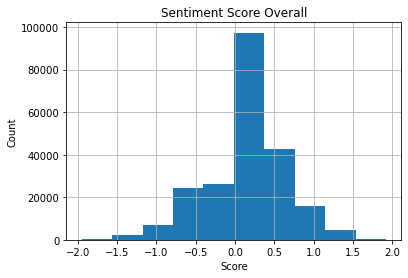

In [65]:
df['Sentiment Score Overall'].hist()
plt.title('Sentiment Score Overall')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

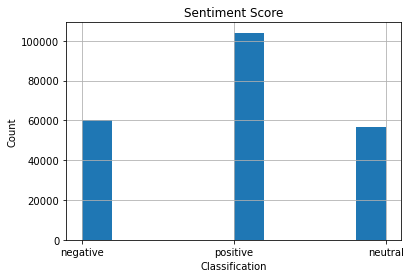

In [71]:
df['Sentiment Score Overall Classification'].hist()
plt.title('Sentiment Score')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()